# DATA MINING CAHPTER6
##### 유사도와 군집화

## 6-1 KNN Modeling(붓꽃 판별기)

In [305]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as knn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### 1. 데이터 불러오기 및 훑어보기

<<DESCRIBE>>
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

<<SKEWNESS>>
sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

<<KURTOSIS>>
sepal length   -0.552064
sepal width     0.290781
petal length   -1.401921
petal width    -1.339754
dtype: float64

<<MISSING>>
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

<<HISTOGRAM>>


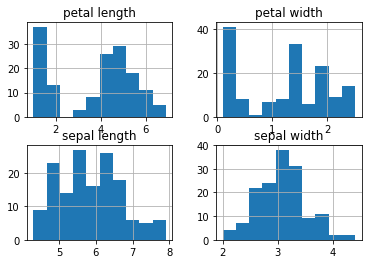

In [8]:
df = pd.read_csv("iris.csv")
def skimming(df):
    print("<<DESCRIBE>>")
    print(df.describe())
    print("\n<<SKEWNESS>>")
    print(df.skew())
    print("\n<<KURTOSIS>>")
    print(df.kurtosis())
    print("\n<<MISSING>>")
    print(df.isna().sum())
    print("\n<<HISTOGRAM>>")
    df.hist()

skimming(df)

#### 2. 데이터 나누기

In [13]:
mask = np.random.rand(len(df)) < 0.5
train = df[mask]
test = df[~mask]
print(len(test))
print(len(train))

77
73


In [53]:
x_train=train.drop(columns=['class'])
y_train=train['class'].values

x_test=test.drop(columns=['class'])
y_test=test['class'].values

#### 3. 모델링

In [117]:
model = knn(n_neighbors=3)
model.fit(x_train,y_train)
pred=model.predict(x_test)
test["pred"]=pred

#### 4. 평가 및 시각화

In [66]:
knn.score(model,x_test,y_test)#### 3. 모델링

0.974025974025974

In [107]:
confusion_matrix(test['class'],test['pred'])

array([[21,  0,  0],
       [ 0, 25,  1],
       [ 0,  1, 29]], dtype=int64)

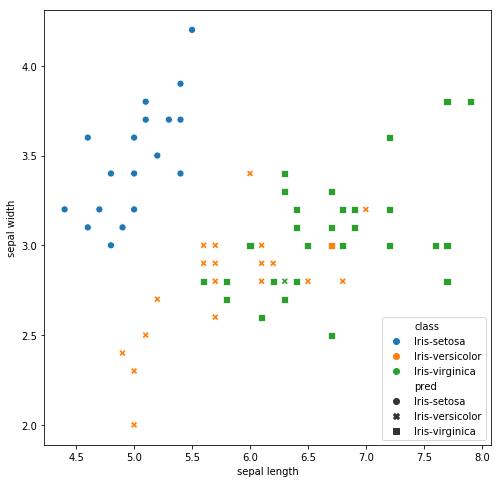

In [96]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=test['sepal length'], 
                y=test['sepal width'],
                hue='class', # different colors by group
                style='pred',
                s=50, data=test)

plt.show()

## 6-1(A) KNN Modeling Optimization(붓꽃과 최적화)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [136]:
df = pd.read_csv("iris.csv")


In [153]:
kf=KFold(n_splits=5)
best_score=0
best_k=0
for i in range(10):
    cnt=0
    score=[]
    print("///////////////////Number of Neighbors = ",i+1,"///////////////////")
    for train, test in kf.split(df):
        train,test=df.loc[train],df.loc[test]

        train_x = train.drop(columns='class')
        train_y = train['class'].values

        test_x = test.drop(columns='class')
        test_y = test['class'].values
        
        model = knn(n_neighbors=i+1)
        model.fit(train_x,train_y)
        
        pred=model.predict(test_x)
        test["pred"]=pred
        print("FOLD", cnt)
        cnt+=1
        print(knn.score(model,x_test,y_test))
        print()
        score.append(knn.score(model,x_test,y_test))
    print("평균 스코어 :",round(np.mean(score),2))
    print()
    if np.mean(score)>best_score : best_score,best_k = np.mean(score), i+1
print("최적 K = ",best_k)
print("최고 SCORE = ", best_score)

///////////////////Number of Neighbors =  1 ///////////////////
FOLD 0
1.0

FOLD 1
1.0

FOLD 2
1.0

FOLD 3
1.0

FOLD 4
0.948051948051948

평균 스코어 : 0.99

///////////////////Number of Neighbors =  2 ///////////////////
FOLD 0
0.987012987012987

FOLD 1
0.987012987012987

FOLD 2
1.0

FOLD 3
0.974025974025974

FOLD 4
0.935064935064935

평균 스코어 : 0.98

///////////////////Number of Neighbors =  3 ///////////////////
FOLD 0
0.987012987012987

FOLD 1
0.987012987012987

FOLD 2
0.987012987012987

FOLD 3
0.987012987012987

FOLD 4
0.948051948051948

평균 스코어 : 0.98

///////////////////Number of Neighbors =  4 ///////////////////
FOLD 0
0.987012987012987

FOLD 1
0.987012987012987

FOLD 2
0.987012987012987

FOLD 3
0.987012987012987

FOLD 4
0.948051948051948

평균 스코어 : 0.98

///////////////////Number of Neighbors =  5 ///////////////////
FOLD 0
1.0

FOLD 1
1.0

FOLD 2
0.987012987012987

FOLD 3
1.0

FOLD 4
0.948051948051948

평균 스코어 : 0.99

///////////////////Number of Neighbors =  6 ///////////////////
FOL

## 6-2 KNN Modeling (자동차 문제)

In [190]:
DF = pd.read_excel('car_sales_mod.xlsx')

<<DESCRIBE>>
            sales        type       price    engine_s    horsepow    wheelbas  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean    52.666097    0.266234   27.338552    3.042208  183.987013  107.422078   
std     68.753988    0.443430   14.342627    1.051036   57.144009    7.670180   
min      0.000000    0.000000    9.235000    1.000000   55.000000   92.600000   
25%     13.006750    0.000000   17.953750    2.300000  146.500000  103.000000   
50%     28.413500    0.000000   22.747000    3.000000  175.000000  107.000000   
75%     67.640000    1.000000   31.956250    3.500000  210.000000  112.050000   
max    540.561000    1.000000   85.500000    8.000000  450.000000  138.700000   

            width     length    curb_wgt    fuel_cap         mpg     lnsales  \
count  154.000000  154.00000  154.000000  154.000000  154.000000  154.000000   
mean    71.094805  186.98961    3.380649   17.914935   23.999351    3.246284   
std      3.467549

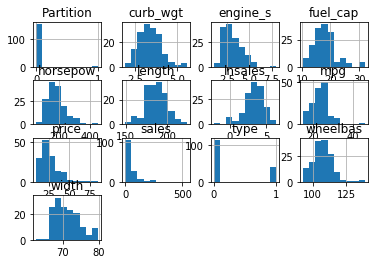

In [191]:
skimming(DF)

In [192]:
DF[-2:]

,manufact,model,sales,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Partition
152,UD,newCar,0.0,0,21.5,1.5,76,106.3,67.9,175.0,2.932,11.9,46.0,0.0,1
153,UD,newTruck,0.0,1,34.2,3.5,167,109.8,75.2,188.4,4.508,17.2,26.0,0.0,1


In [193]:
df=DF.drop(columns=['sales','type','lnsales','Partition','model'])

In [194]:
train = df[:-2]
test = df[-2:]
x_train = train.drop(columns='manufact')
y_train = train['manufact'].values
x_test = test.drop(columns='manufact')
y_test = test['manufact'].values

In [195]:
model = knn(n_neighbors=5,p=2) #p=2이면 강제 유클리드 거리 사용
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred_prob=model.predict_proba(x_test)
test["pred"]=pred


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [221]:
test

,manufact,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,pred
152,UD,21.5,1.5,76,106.3,67.9,175.0,2.932,11.9,46.0,Saturn
153,UD,34.2,3.5,167,109.8,75.2,188.4,4.508,17.2,26.0,Nissan


In [223]:
print(DF.loc[DF["manufact"]==test.iloc[0,10],:])
print(DF.loc[DF["manufact"]==test.iloc[1,10],:])

    manufact model   sales  type   price  engine_s  horsepow  wheelbas  width  \
124   Saturn    SL  80.620     0  10.685       1.9       100     102.4   66.4   
125   Saturn    SC  24.546     0  12.535       1.9       100     102.4   66.4   
126   Saturn    SW   5.223     0  14.290       1.9       124     102.4   66.4   
127   Saturn    LW   8.472     0  18.835       2.2       137     106.5   69.0   
128   Saturn    LS  49.989     0  15.010       2.2       137     106.5   69.0   

     length  curb_wgt  fuel_cap   mpg   lnsales  Partition  
124   176.9     2.332      12.1  33.0  4.389747          0  
125   180.0     2.367      12.1  33.0  3.200549          0  
126   176.9     2.452      12.1  31.0  1.653072          0  
127   190.4     3.075      13.1  27.0  2.136767          0  
128   190.4     2.910      13.1  28.0  3.911803          0  
    manufact       model   sales  type   price  engine_s  horsepow  wheelbas  \
97    Nissan      Sentra  42.643     0  13.499       1.8       126 

## 6-3 K-Means Clustering

<<DESCRIBE>>
                ID     LONGDIST  International        LOCAL      DROPPED  \
count  1477.000000  1477.000000    1477.000000  1477.000000  1477.000000   
mean   2516.076506    13.637284       0.836382    51.364432     0.123223   
std    1466.860125     9.394239       2.236858    54.682594     0.424179   
min       0.000000     0.000000       0.000000     0.049147     0.000000   
25%    1229.000000     5.173330       0.000000    13.460000     0.000000   
50%    2570.000000    13.683000       0.000000    35.014400     0.000000   
75%    3772.000000    22.078400       0.000000    71.661400     0.000000   
max    4999.000000    29.982000       9.950900   450.624000     4.000000   

               AGE     CHILDREN    Est_Income        train  
count  1477.000000  1477.000000   1477.000000  1477.000000  
mean     57.562627     0.989167  50290.691485     2.026405  
std      22.842655     0.824681  28445.207066     0.818142  
min      18.000000     0.000000    110.284000     1.000000

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED,train
0,0,5.246400,7.515100,86.327800,0,'CH','FreeLocal','Standard',57,'F','M',2,27535.30,'Y','Vol',1
1,3,0.000000,0.000000,3.942290,0,'CC','Budget','Intnl_discount',50,'F','S',2,64632.30,'N','InVol',2
2,4,5.555640,0.000000,9.363470,1,'CC','Budget','Intnl_discount',68,'F','M',2,81000.90,'N','Vol',1
3,8,14.019300,5.680430,29.806500,0,'CC','Budget','Standard',34,'M','S',0,87467.10,'Y','Current',1
4,10,13.664000,2.956420,32.638100,0,'CC','FreeLocal','Intnl_discount',60,'M','M',2,83220.60,'N','Vol',1
5,11,0.000000,0.000000,1.412940,0,'CC','FreeLocal','Standard',84,'F','S',0,50290.70,'N','InVol',3
6,13,0.281029,0.000000,8.536920,0,'CH','Budget','Intnl_discount',28,'F','M',2,20850.40,'N','Vol',1
7,17,1.577000,0.000000,19.980800,0,'CC','FreeLocal','Standard',52,'M','S',0,84112.60,'N','Current',1
8,19,11.030700,0.000000,34.277700,0,'CC','Budget','Standard',87,'F','S',2,3776.12,'N','Vol',3
9,20,0.452629,0.000000,73.012200,0,'Auto','FreeLocal','Standard',88,'F','M',2,73865.90,'Y','Vol',1


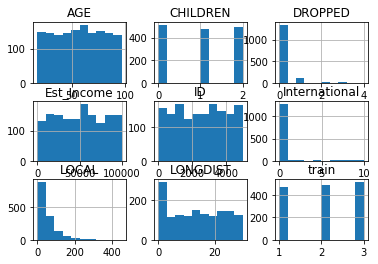

In [389]:
df = pd.read_csv("churn123.txt")

skimming(df)
df

In [402]:
df.loc[df.CHURNED == "'Vol'", 'Leaver'] = "True"
df.loc[df.CHURNED != "'Vol'", 'Leaver'] = 'False'

In [408]:
x=pd.concat([df.iloc[:,1:5],df.iloc[:,12:13],df['AGE']],axis=1)
# stats.zscore(df2)
# df2
# stats.zscore(df2).shape


In [409]:
from scipy import stats
x['LONGDIST']=stats.zscore(df['LONGDIST'])
x['Internationial']=stats.zscore(df['International'])
x['LOCAL']=stats.zscore(df['LOCAL'])
x['DROPPED']=stats.zscore(df['DROPPED'])
x['AGE']=stats.zscore(df['AGE'])
x['CHILDREN']=stats.zscore(df['CHILDREN'])
x['Est_Income']=stats.zscore(df['Est_Income'])
x=x.values
y=df.iloc[:,-1].values
print(x)
print(y)

[[-0.8934972   7.5151      0.63960407 ... -0.02463888  2.98676967
   1.22614038]
 [-1.45215629  0.         -0.86751928 ... -0.33118691 -0.37403592
   1.22614038]
 [-0.86056801  0.         -0.76834666 ...  0.45707945 -0.37403592
   1.22614038]
 ...
 [-0.48501928  7.04035    -0.70109902 ...  0.5446646   2.77445813
   0.01314015]
 [ 0.95674156  0.         -0.46833922 ... -0.90049039 -0.37403592
  -1.19986007]
 [ 0.83935329  0.         -0.58858455 ... -0.72532009 -0.37403592
  -1.19986007]]
[0 1 1 ... 0 1 1]


In [397]:
best_score = 0
best_k=0
for n in range(10):
    k=n+2
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(x)
    s = silhouette_score(x, labels)
    print("K :",k)
    print("Silhouette :", s)
    
    if best_score<s : best_score,best_k=s,k

K : 2
Silhouette : 0.583754022854869
K : 3
Silhouette : 0.17702029317522408
K : 4
Silhouette : 0.18744195180316947
K : 5
Silhouette : 0.1961625594370131
K : 6
Silhouette : 0.18650360757145598
K : 7
Silhouette : 0.1702363264464704
K : 8
Silhouette : 0.17350986946571917
K : 9
Silhouette : 0.174999428044925
K : 10
Silhouette : 0.16823023315386676
K : 11
Silhouette : 0.1781060096189863


In [413]:
model = KMeans(n_clusters=best_k)
labels = model.fit_predict(x)
s= silhouette_score(x, labels)
df['cluster']=labels


In [414]:
df.groupby(['cluster']).mean()

,ID,LONGDIST,International,LOCAL,DROPPED,AGE,CHILDREN,Est_Income,train
cluster,,,,,,,,,
0,2517.309091,13.388991,0.106928,49.888104,0.121970,57.631818,0.998485,50011.913336,2.023485
1,2505.713376,15.724842,6.969367,63.776874,0.133758,56.980892,0.910828,52634.558726,2.050955


In [415]:
df.groupby('cluster').agg(lambda x: stats.mode(x)[0][0]).loc[:,['PAY_MTHD','LocalBillType','LongDistanceBillType','SEX','STATUS','Car_Owner','CHURNED','Leaver']]

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,PAY_MTHD,LocalBillType,LongDistanceBillType,SEX,STATUS,Car_Owner,CHURNED,Leaver
cluster,,,,,,,,
0,'CC','Budget','Standard','F','M','N','Current',False
1,'CC','Budget','Standard','F','M','N','Vol',True
